# PLOTTING IN PYTHON

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('penguins_simple.csv', sep=';')  #change path to your local copy of the data

In [6]:
df

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,45.2,14.8,212.0,5200.0,FEMALE


## 1. Plotting with pandas

<AxesSubplot:>

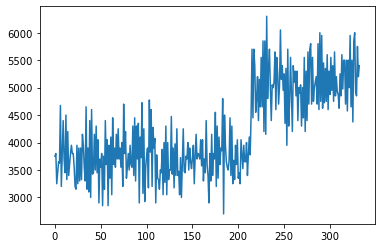

In [7]:
#plot one column
df['Body Mass (g)'].plot()   #default: line-plot.

<AxesSubplot:>

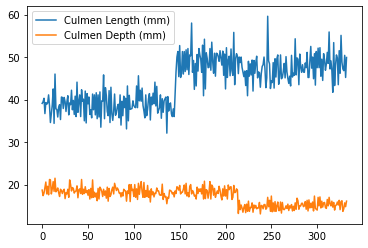

In [8]:
# plot two columns
df[['Culmen Length (mm)', 'Culmen Depth (mm)']].plot()  #automatic legend

#### Do larger penguins have longer flippers?  

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

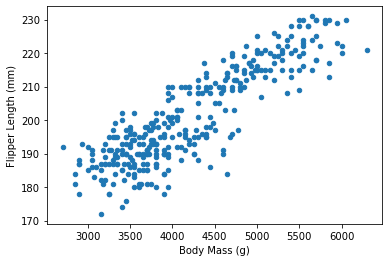

In [9]:
# plot one column against another
df.plot(x='Body Mass (g)', y= 'Flipper Length (mm)', kind='scatter')  # second kind of syntax

#### distribution of Culmen Length

<AxesSubplot:ylabel='Frequency'>

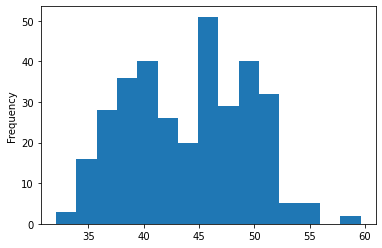

In [11]:
df['Culmen Length (mm)'].plot(kind='hist', bins = 15)

<AxesSubplot:>

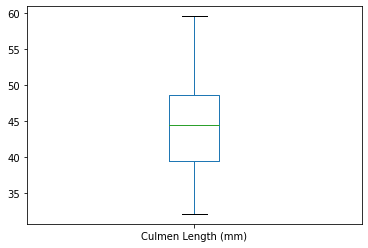

In [12]:
df['Culmen Length (mm)'].plot(kind='box')

In [ ]:
# green line: median (splits the samples into equal-numbered halfs)
# box: Interquartile range (50% in the middle)
# whiskers: highest and lowest occuring value in Q1 − 1.5*IQR and Q3 + 1.5*IQR
# plus maybe outliers

<AxesSubplot:>

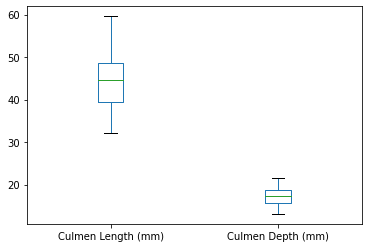

In [15]:
df[['Culmen Length (mm)', 'Culmen Depth (mm)']].plot(kind='box')

#### Are male penguins heavier than female penguins?

<AxesSubplot:ylabel='Frequency'>

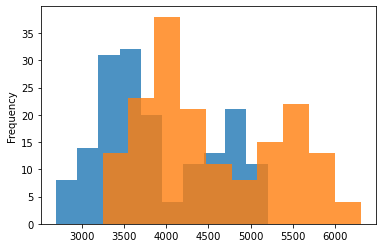

In [16]:
# selecting by conditions, plotting two in one, introducing alpha, histogram
df['Body Mass (g)'].loc[df['Sex'] == 'FEMALE'].plot(alpha = 0.8, kind='hist')  # legend will only display column-name
df['Body Mass (g)'].loc[df['Sex'] == 'MALE'].plot(alpha = 0.8, kind='hist')

In [ ]:
# here we now see: maybe we want to adjust some things, customizer, add a legend,... 
# for this, we need to look a bit deeper. 

#### Other plots with pandas: 
check the documentation here: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

## 2. Plotting with Matplotlib

matplotlib creates plots from list-like data (lists, np.arra, pd.Series

In [19]:
import matplotlib.pyplot as plt

ValueError: Unrecognized marker style 'triangle'

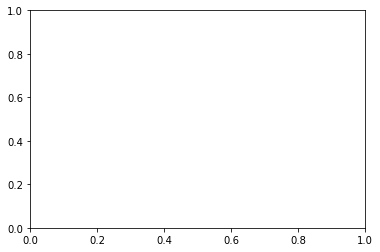

In [24]:
plt.scatter(df['Culmen Depth (mm)'], df['Culmen Length (mm)'], c= 'magenta', s = 100.1, marker = 'triangle' )  
plt.xlabel('Beak width [mm]', fontsize = 20)
plt.ylabel('Beak length [mm]')
plt.title('Beaks of Adelie penguins')
# plt.show() <----- not necessary in jupyter

Gallery: https://matplotlib.org/3.1.0/gallery/index.html  
Great youtube series on matplotlib: https://www.youtube.com/playlist?list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_

## 3. Plotting with Seaborn
- more examples in the course material

In [25]:
#!pip install seaborn

In [26]:
import seaborn as sns

Text(0.5, 1.0, 'Culmen Length and depth by Species')

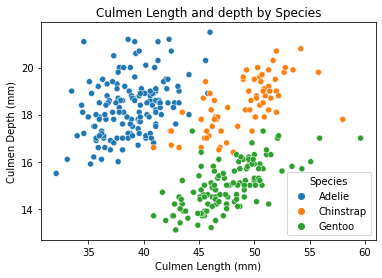

In [27]:
sns.scatterplot(data=df, x='Culmen Length (mm)', y='Culmen Depth (mm)', hue='Species')  #first without "hue"
plt.title('Culmen Length and depth by Species')
# color palettes (google seaborn colors)

/Users/FelixAir/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Body Mass (g)', ylabel='Density'>

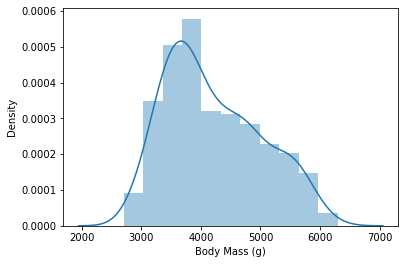

In [28]:
sns.distplot(df['Body Mass (g)'])

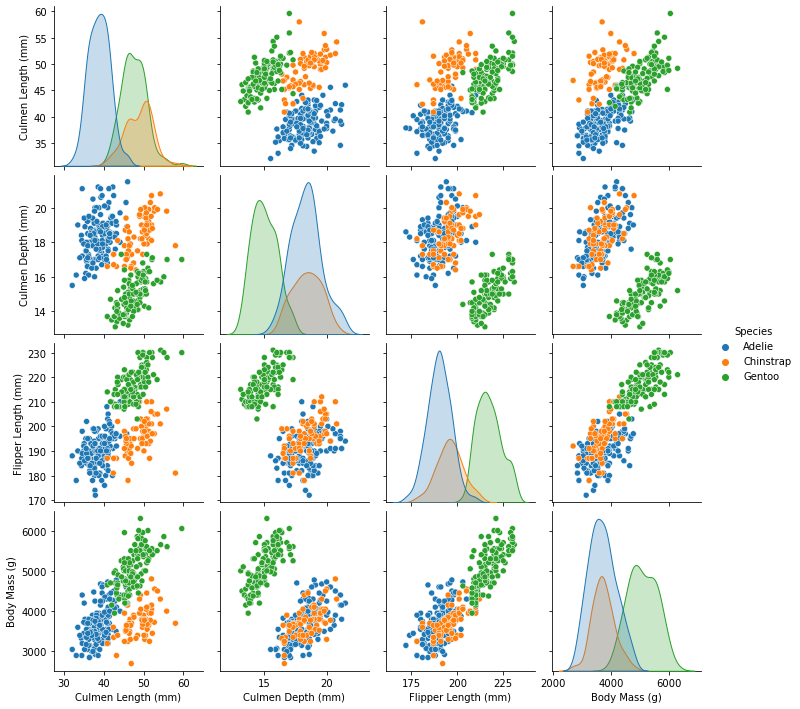

In [29]:
sns.pairplot(data=df, hue='Species')

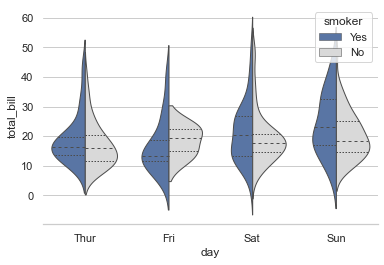

In [30]:
### pasted directly from the seaborn library online 

import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
               split=True, inner="quart", linewidth=1,
               palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)

#### Exercises with seaborn and matplotlib: 
- Draw a histogram that shows how many penguins of each species are in the data
- create a plot of your choosing that only shows the data of female Gentoos.
- Create a scatterplot of the culmen length and depth where the size of the markers represent the Body mass of the penguin
- Find at least one more way (besides a scatterplot) to visualize the relationship between culmen lenght and depth (or another bivariate distribution)

Plotting inspiration:
    https://python-graph-gallery.com/  
Advice on how to use colors: https://academy.datawrapper.de/article/140-what-to-consider-when-choosing-colors-for-data-visualization and https://projects.susielu.com/viz-palette